# **Importing Libraries**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preparation, Understanding & Feature Engineering**

### *Read dataset from csv file*
**Dataset Source** : https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset

In [52]:
df = pd.read_csv('shopping_behavior_updated.csv')

### *Show 5 first Row*

In [53]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### *Show Table Informations*

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

### *Show unique values in each column*

In [55]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

### *Show NULL values in each column*

In [56]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### *Show duplicate data*

In [57]:
df.duplicated().sum()

0

### *Dataset Descriptive Statistics*

In [58]:
#Numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [59]:
#Categorical columns
df.describe(include='object').T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


### *Location Counts*

In [60]:
location_counts = df["Location"].value_counts()
print("Location Counts:\n", location_counts)

Location Counts:
 Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii 

### *Mean, median and sum of purchase amount for each location*

In [61]:
location_purchase_stats = df.groupby("Location")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
print("Regional Purchase Amount Stats:\n", location_purchase_stats)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Alabama         59.112360    56.0  5261
Alaska          67.597222    68.5  4867
Arizona         66.553846    68.0  4326
Arkansas        61.113924    58.0  4828
California      59.000000    57.0  5605
Colorado        56.293333    51.0  4222
Connecticut     54.179487    48.5  4226
Delaware        55.325581    52.5  4758
Florida         55.852941    56.0  3798
Georgia         58.797468    62.0  4645
Hawaii          57.723077    55.0  3752
Idaho           60.075269    62.0  5587
Illinois        61.054348    65.0  5617
Indiana         58.924051    60.0  4655
Iowa            60.884058    60.0  4201
Kansas          54.555556    50.0  3437
Kentucky        55.721519    53.0  4402
Louisiana       57.714286    55.5  4848
Maine           56.987013    57.0  4388
Maryland        55.755814    52.0  4795
Massachusetts   60.888889    64.0  4384
Michigan        62.095890    63.0  4533
Minneso

### *Feature engineering*

#### Binning Frequency of Purchases & Create New Column, if in ['Monthly', 'Quarterly', 'Annually', 'Every 3 Months'] make it 'Rarely' else 'Frequently'

In [62]:

df['Frequency of Purchases Category'] = np.where(df['Frequency of Purchases'].isin(['Monthly', 'Quarterly', 'Annually', 'Every 3 Months']), 'Rarely (Once every 1 - 12 months)', 'Frequently (Once every 1 - 2 weeks)')
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency of Purchases Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Frequently (Once every 1 - 2 weeks)
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Frequently (Once every 1 - 2 weeks)


#### Binning the 'Previous Purchases' column, and creating a new column called 'Previous Purchase Category'

In [63]:
df['Previous Purchase Category'] = np.where(df['Previous Purchases'] > 30, 'More than 30 items', np.where(df['Previous Purchases'] > 0, '1-30 items', 'No previous purchase'))
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency of Purchases Category,Previous Purchase Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items


#### Create new column that contain Age Group Category for every row in dataset

In [64]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '>65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency of Purchases Category,Previous Purchase Category,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,45-55
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,<25


#### Create new column that contain Purchase Amount Category for every row in dataset

In [65]:
df['Purchase Amount Category'] = np.where(df['Purchase Amount (USD)'] < 65, 'Below 65 USD', 'Above 65 USD')
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency of Purchases Category,Previous Purchase Category,Age Group,Purchase Amount Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,45-55,Below 65 USD
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,<25,Below 65 USD


### *Correlation matrix of numerical variables*

In [66]:
correlation_matrix = df[['Age', 'Previous Purchases', 'Purchase Amount (USD)', 'Review Rating']].corr()
correlation_matrix

,Age,Previous Purchases,Purchase Amount (USD),Review Rating
Age,1.000000,0.040445,-0.010424,-0.021949
Previous Purchases,0.040445,1.000000,0.008063,0.004229
Purchase Amount (USD),-0.010424,0.008063,1.000000,0.030776
Review Rating,-0.021949,0.004229,0.030776,1.000000


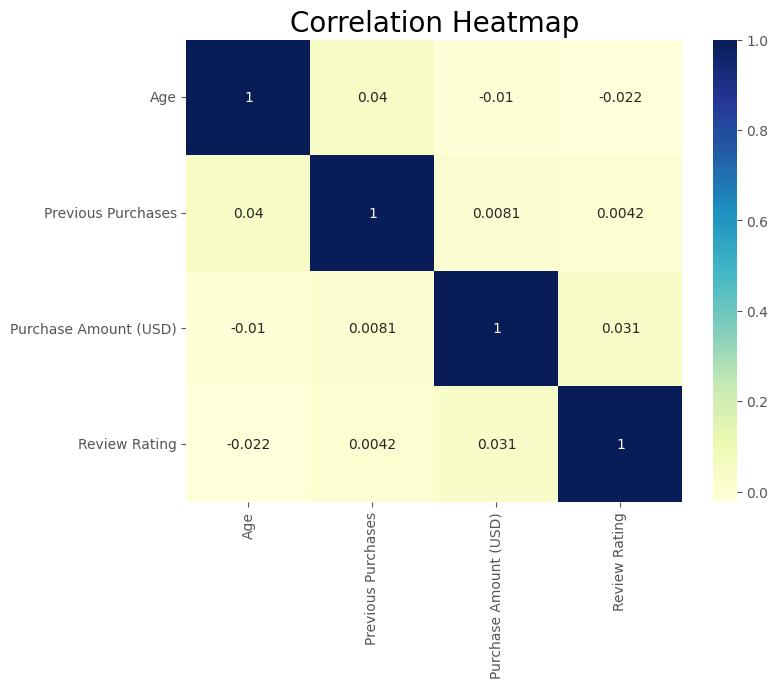

In [67]:
# Show correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='YlGnBu')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

- Age have a weak negative correlation with Previous Purchases and Purchase Amount (USD)
- Previous Purchases have a weak positive correlation with Purchase Amount (USD)
- Review Rating have a weak positive correlation with Purchase Amount (USD)


### *Outlier Detection in all numerical columns*

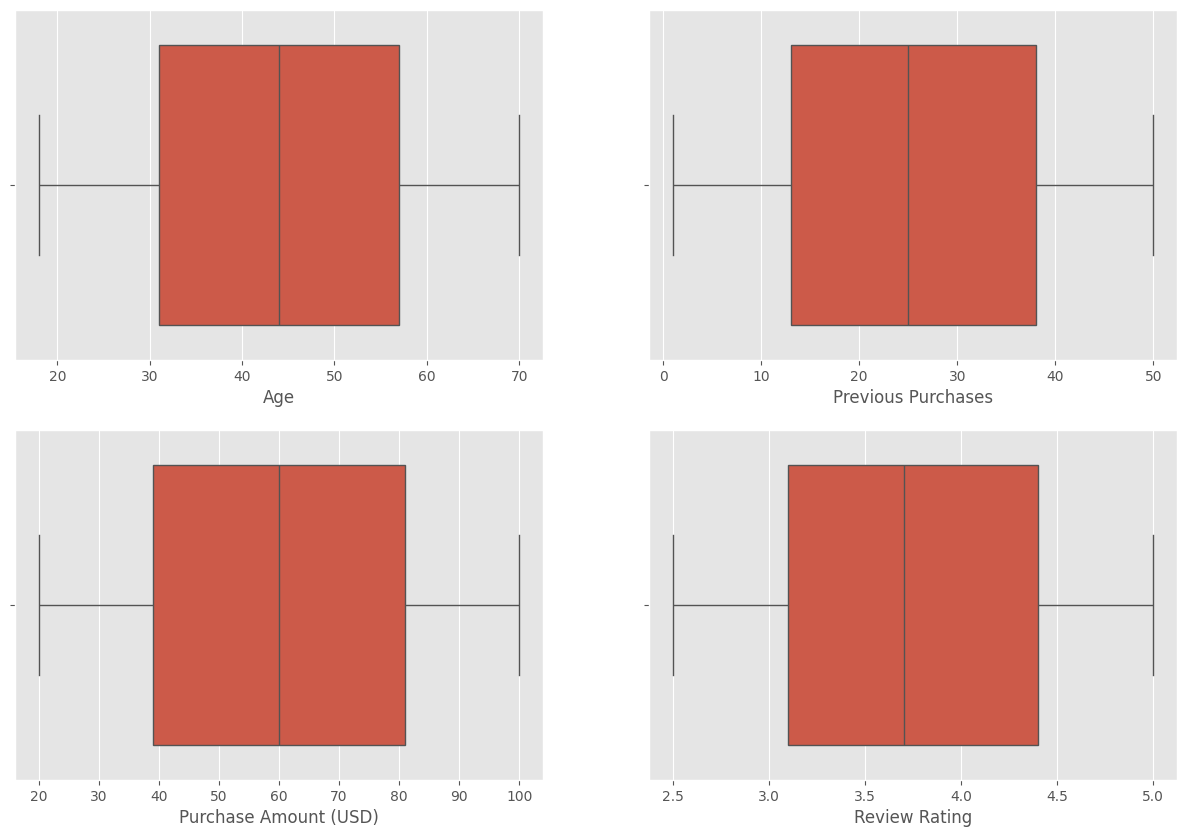

In [68]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Age'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Previous Purchases'])
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Review Rating'])
plt.show()

- There is no outliers in all numerical columns

### *Merging datasets for visualization purposes in Tableau*

US Latitude & Longitude Data source: https://github.com/jasperdebie/VisInfo/blob/master/us-state-capitals.csv

In [69]:
df2 = pd.read_csv('us-state-capitals_Lat-Lon.csv')
df2.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [70]:
df3 = pd.merge(df, df2, left_on='Location', right_on='name', how='left')
df3.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,Frequency of Purchases Category,Previous Purchase Category,Age Group,Purchase Amount Category,name,description,latitude,longitude
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,45-55,Below 65 USD,Kentucky,Frankfort,38.186722,-84.875374
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,<25,Below 65 USD,Maine,Augusta,44.307167,-69.781693


In [71]:
#delete columns 'name' and 'description'
df3.drop(['name', 'description'], axis=1, inplace=True)
df3.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency of Purchases Category,Previous Purchase Category,Age Group,Purchase Amount Category,latitude,longitude
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,45-55,Below 65 USD,38.186722,-84.875374
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,Frequently (Once every 1 - 2 weeks),1-30 items,<25,Below 65 USD,44.307167,-69.781693


In [72]:
df3.isnull().sum()

Customer ID                        0
Age                                0
Gender                             0
Item Purchased                     0
Category                           0
Purchase Amount (USD)              0
Location                           0
Size                               0
Color                              0
Season                             0
Review Rating                      0
Subscription Status                0
Shipping Type                      0
Discount Applied                   0
Promo Code Used                    0
Previous Purchases                 0
Payment Method                     0
Frequency of Purchases             0
Frequency of Purchases Category    0
Previous Purchase Category         0
Age Group                          0
Purchase Amount Category           0
latitude                           0
longitude                          0
dtype: int64

# **Data Visualization**

### *Barplot of Frequency of Purchases*

C:\Users\Aby\AppData\Local\Temp\ipykernel_6376\2791321246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency of Purchases', data=df, palette='viridis', order=df['Frequency of Purchases'].value_counts().index)


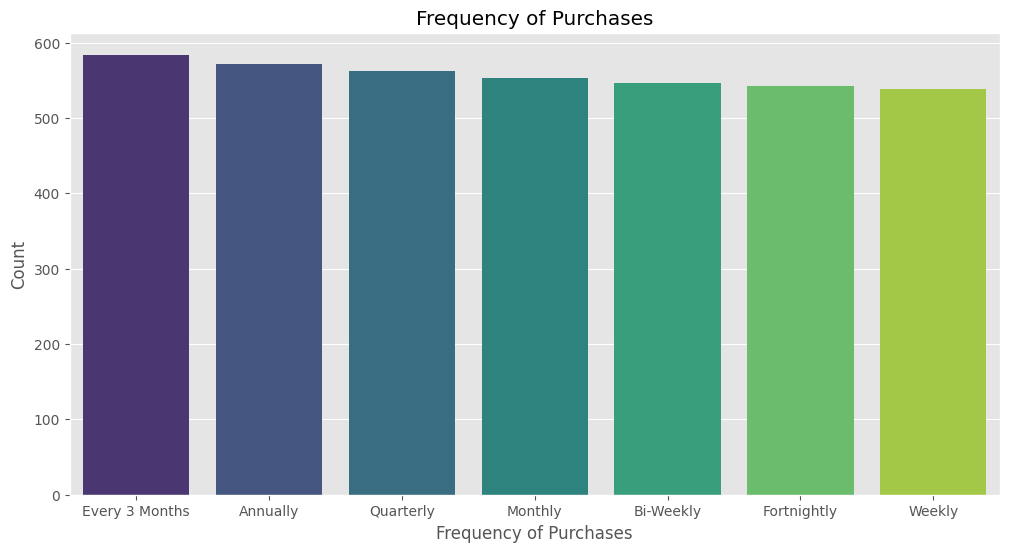

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x='Frequency of Purchases', data=df, palette='viridis', order=df['Frequency of Purchases'].value_counts().index)
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases')
plt.show()

### *Bar plot of 'frequency of purchase category' (Using the bin column that create earlier)*

C:\Users\Aby\AppData\Local\Temp\ipykernel_6376\3783739517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency of Purchases Category', data=df, palette='Set2')


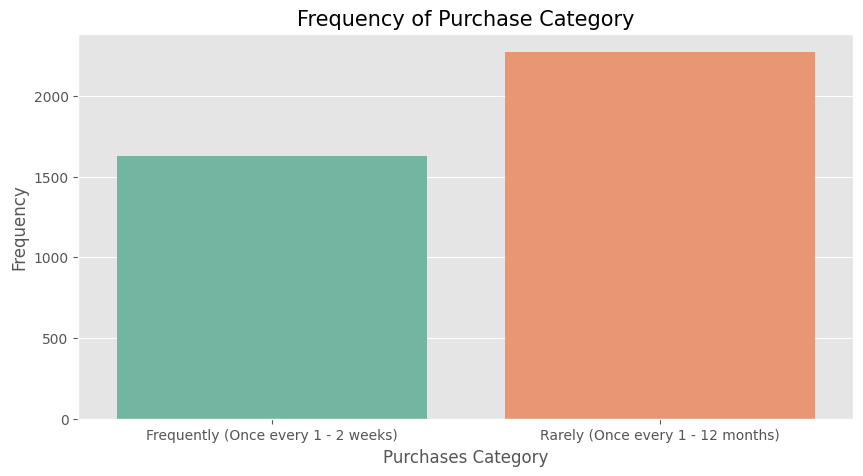

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x='Frequency of Purchases Category', data=df, palette='Set2')
plt.title('Frequency of Purchase Category', fontsize=15)
plt.xlabel('Purchases Category')
plt.ylabel('Frequency')
plt.show()

### *Pie chart Percentages of 'frequency of purchase Category'*

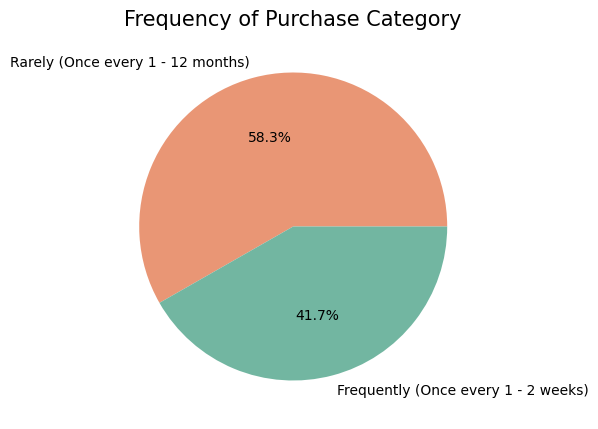

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
df['Frequency of Purchases Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#e99675','#72b6a1'])
plt.title('Frequency of Purchase Category', fontsize=15)
plt.ylabel('')
plt.show()

- From a total of 3900 data observations, 58.3% of E-Commerce users (2272) still rarely make transactions.

### *Histogram of previous purchase Item*

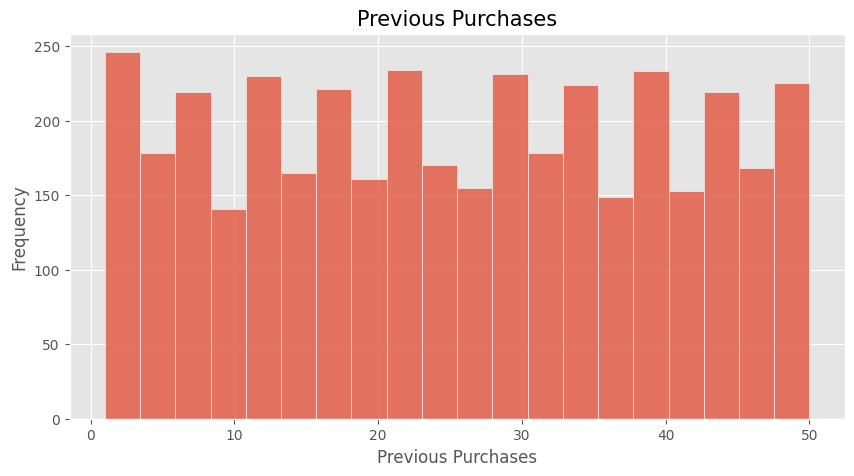

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Previous Purchases', bins=20)
plt.title('Previous Purchases', fontsize=15)
plt.xlabel('Previous Purchases')
plt.ylabel('Frequency')
plt.show()

### *Bar plot of 'previous purchase category' (Using the bin column that create earlier)*

C:\Users\Aby\AppData\Local\Temp\ipykernel_6376\1936717913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Previous Purchase Category', data=df, palette='Set2')


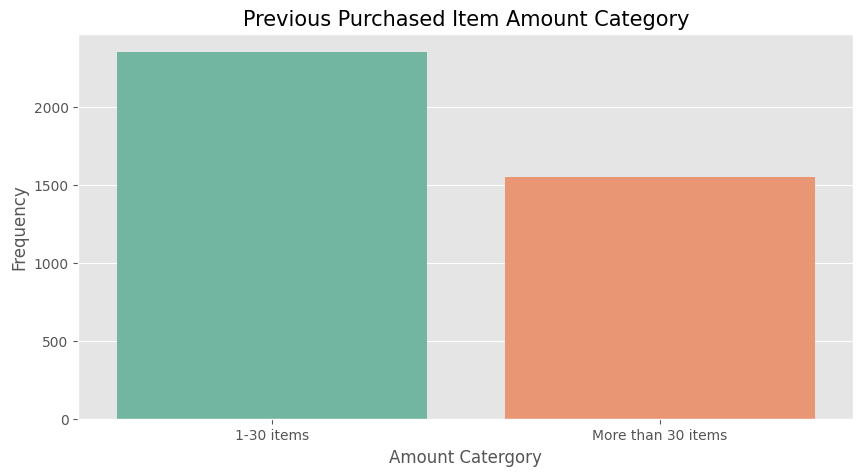

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x='Previous Purchase Category', data=df, palette='Set2')
plt.title('Previous Purchased Item Amount Category', fontsize=15)
plt.xlabel('Amount Catergory')
plt.ylabel('Frequency')
plt.show()

### *Pie chart percentages of 'previous purchase category'*

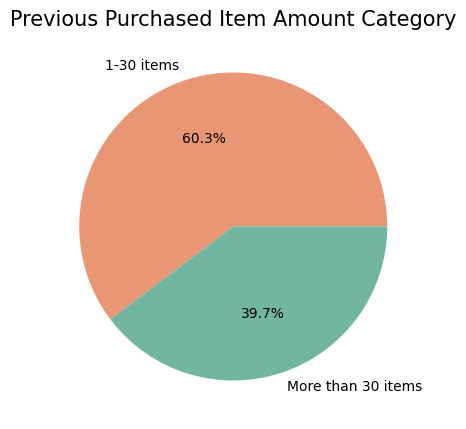

In [78]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
df['Previous Purchase Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#e99675','#72b6a1','#f9cdac'])
plt.title('Previous Purchased Item Amount Category', fontsize=15)
plt.ylabel('')
plt.show()

- The majority of items purchased by users are in the range 1 - 30 items (60.3%).

### *Stacked bar chart of previous purchase category and frequency of purchase category*

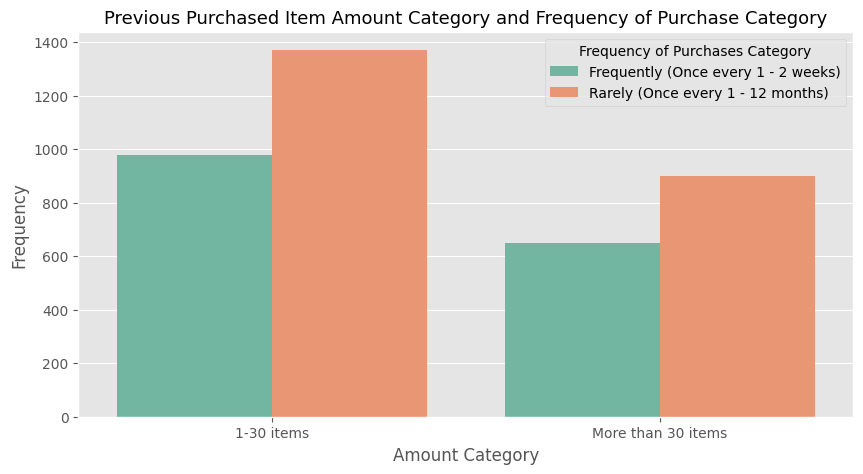

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(x='Previous Purchase Category', data=df, hue='Frequency of Purchases Category', palette='Set2')
plt.title('Previous Purchased Item Amount Category and Frequency of Purchase Category', fontsize=13)
plt.xlabel('Amount Category')
plt.ylabel('Frequency')
plt.show()

### *Purchase Amount Distributions & Averages*

Text(0.5, 0, 'Purchase Amount (USD)')

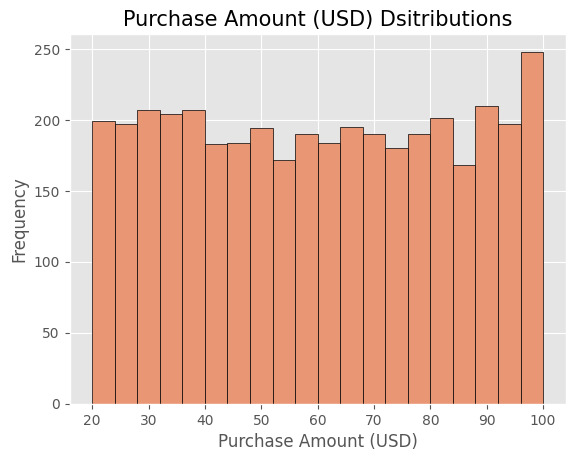

In [80]:
df['Purchase Amount (USD)'].plot.hist(bins=20, color='#e99675', edgecolor='black')
plt.title('Purchase Amount (USD) Dsitributions', fontsize=15)
plt.xlabel('Purchase Amount (USD)')

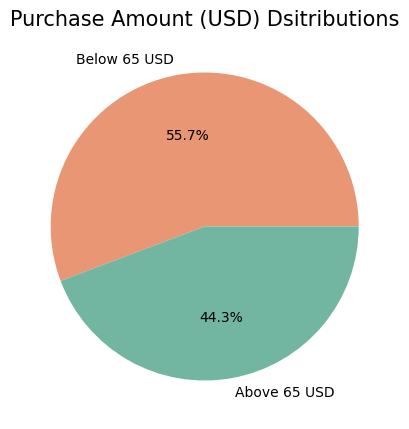

In [81]:
#make the purchase amount percentages into a pie chart (2 categories)
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.pie(df['Purchase Amount Category'].value_counts(), labels=['Below 65 USD', 'Above 65 USD'], autopct='%1.1f%%', colors=['#e99675','#72b6a1'])
plt.title('Purchase Amount (USD) Dsitributions', fontsize=15)
plt.show()

- The average purchase amount is currently around 60 USD and would like to target 65 USD or more.

### *Most frequently purchased item categories*

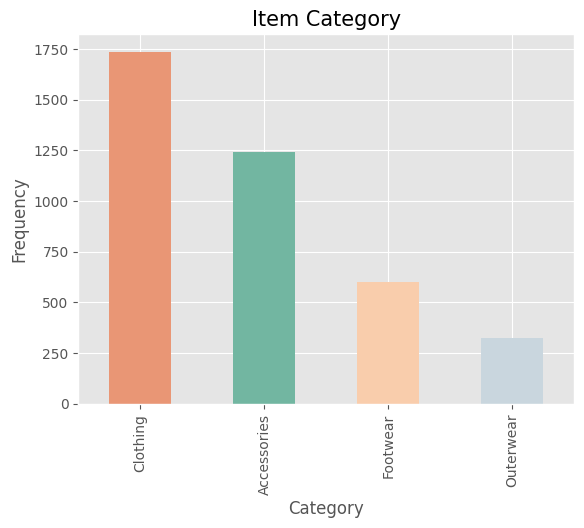

In [82]:
df['Category'].value_counts().plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9'])
plt.title('Item Category', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

### *The category that contributes the most profits (Purchase Amount (USD))*

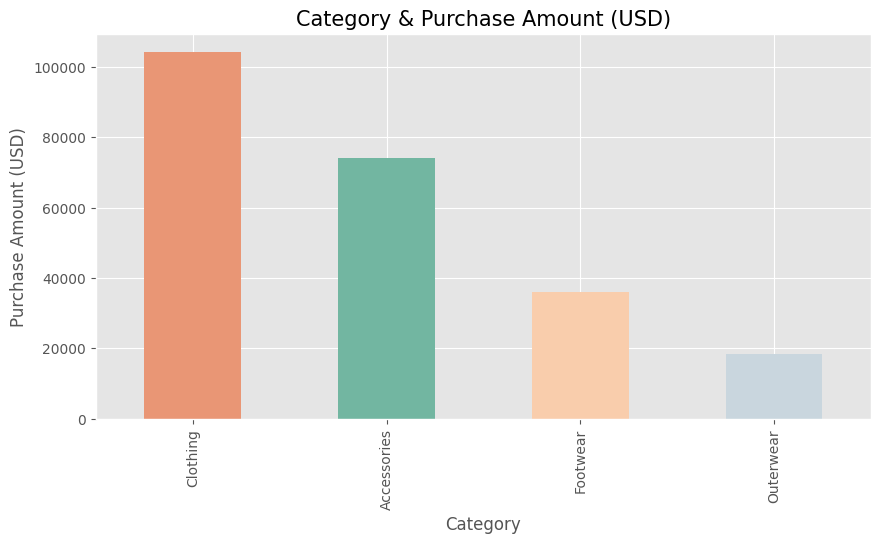

In [83]:
plt.figure(figsize=(10,5))
df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9'])
plt.title('Category & Purchase Amount (USD)', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

- Clothing is the category that contributes the largest profit

### *Top 5 Item Purchased in clothing category*

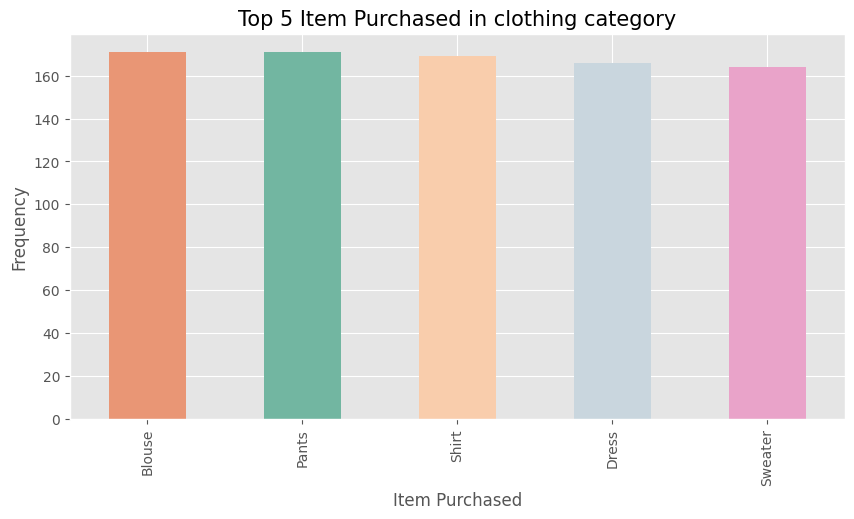

In [84]:
plt.figure(figsize=(10,5))
df[df['Category'] == 'Clothing']['Item Purchased'].value_counts().head().plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9'])
plt.title('Top 5 Item Purchased in clothing category', fontsize=15)
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.show()

- Blouses, pants, shirts, dresses and sweaters are items in the clothing category that are most sought after by customers

### *Item Purchased in Outerwear category*

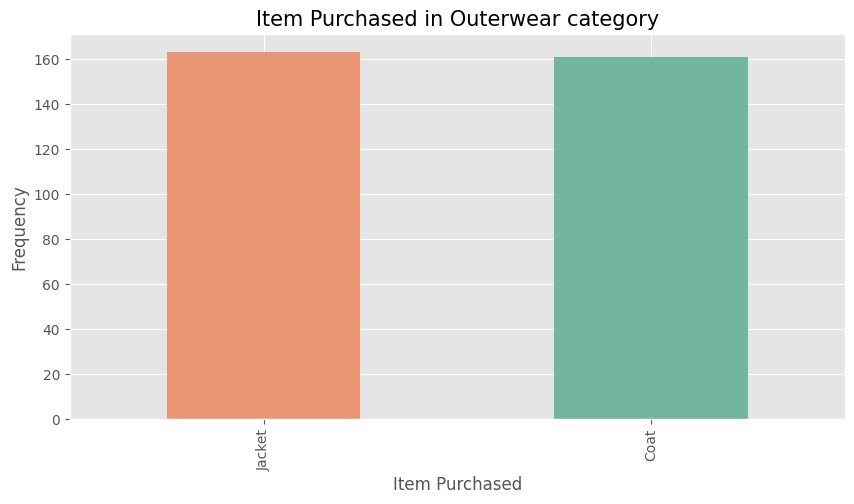

In [85]:
plt.figure(figsize=(10,5))
df[df['Category'] == 'Outerwear']['Item Purchased'].value_counts().head().plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9'])
plt.title('Item Purchased in Outerwear category', fontsize=15)
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.show()

### *Top 5 Regions with the most customers*

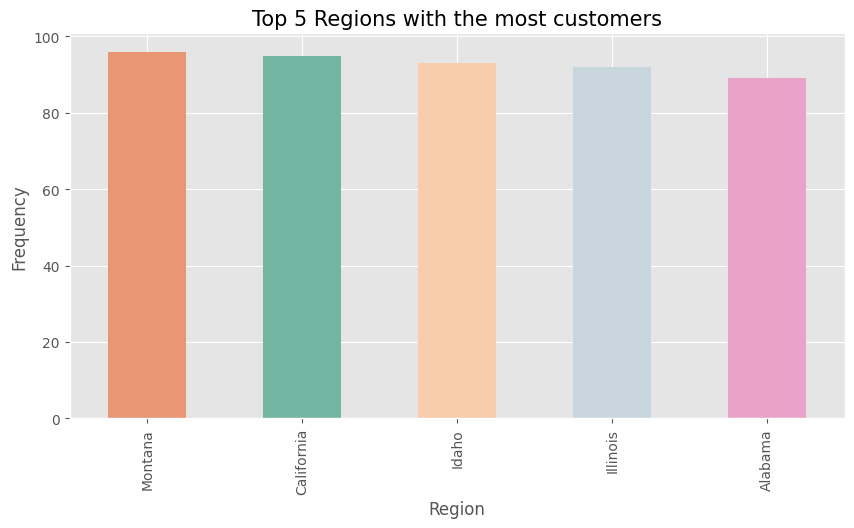

In [86]:
plt.figure(figsize=(10,5))
df['Location'].value_counts().head().plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9'])
plt.title('Top 5 Regions with the most customers', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

- Montana, Illinois, California, Idaho, and Alabama are the regions that have the most customers based on the data

### *Top 5 Regions with the most customers and their item preferences*

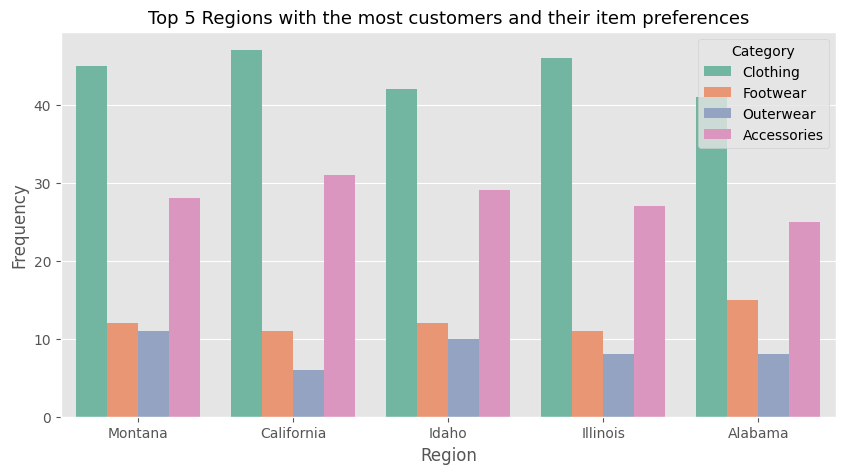

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x='Location', data=df, hue= 'Category', palette='Set2', order=df['Location'].value_counts().head().index)
plt.title('Top 5 Regions with the most customers and their item preferences', fontsize=13)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

- Clothing is the favorite category in the top 5 regions

### *Precentage of male and female customers using pie chart*

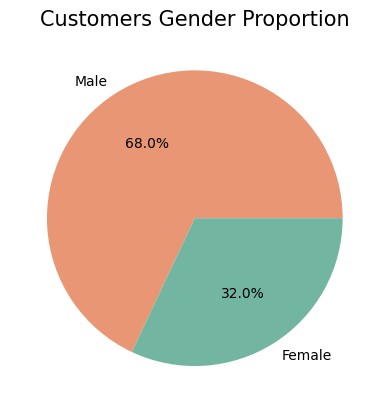

In [88]:
plt.style.use('ggplot')
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#e99675','#72b6a1'])
plt.title('Customers Gender Proportion', fontsize=15)
plt.ylabel('')
plt.show()


### *Gender count in each item category*

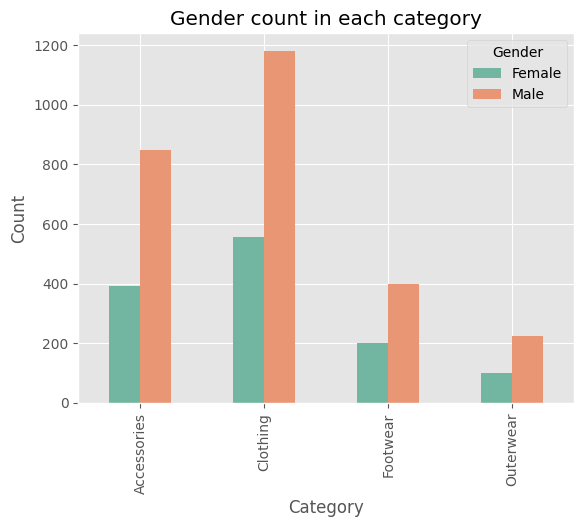

In [89]:
grouped = df.groupby(['Category', 'Gender']).size().unstack()

grouped.plot(kind='bar', stacked=False, color=['#72b6a1', '#e99675'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Gender count in each category')
plt.show()


### *Gender, Item Category and Sum of purchase amount (USD)*

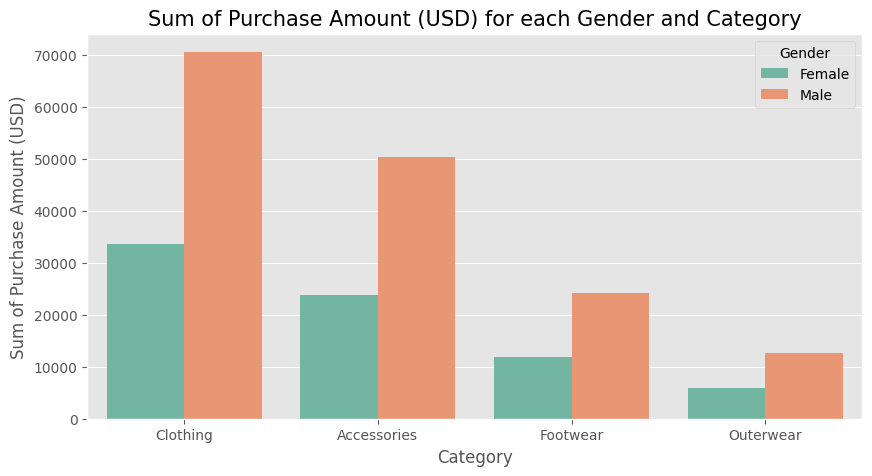

In [90]:
grouped_gender_cat = df.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=grouped_gender_cat, palette='Set2', order=df['Category'].value_counts().index)
plt.title('Sum of Purchase Amount (USD) for each Gender and Category', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Sum of Purchase Amount (USD)')
plt.show()

- Male accounted for 68% of total purchases, while Female accounted for 32% of purchases.
- and clothing is also a category that is very popular with both male and female

### *Number of customers per age category*

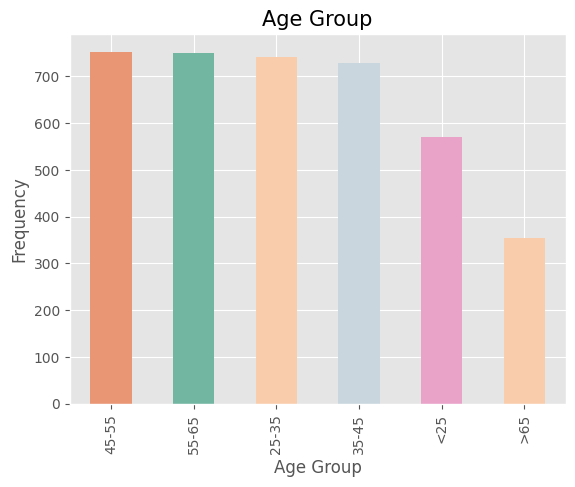

In [91]:
#Age Group value counts
df['Age Group'].value_counts().plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9','#f9cdac'])
plt.title('Age Group', fontsize=15)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

### *Amount of spend per age category*

C:\Users\Aby\AppData\Local\Temp\ipykernel_6376\60690298.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9','#f9cdac'])


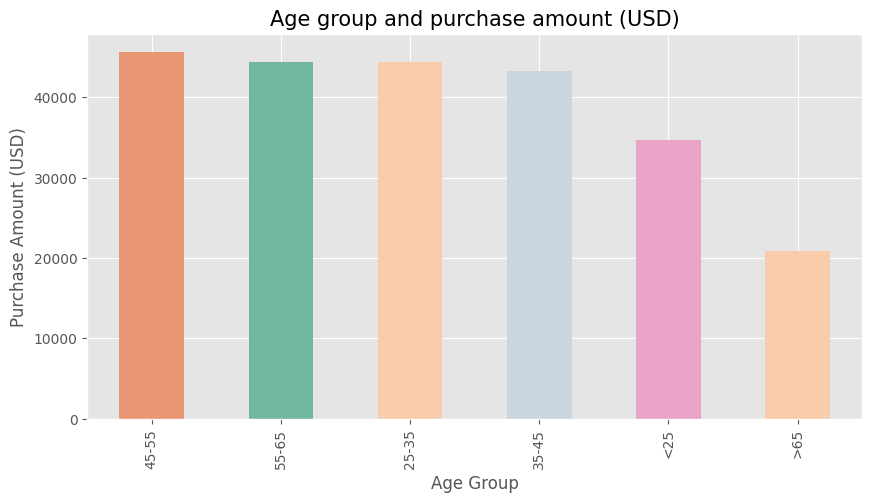

In [92]:
# Age group and purchase amount (USD) plot using pandas
plt.figure(figsize=(10,5))
df.groupby('Age Group')['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de','#e9a3c9','#f9cdac'])
plt.title('Age group and purchase amount (USD)', fontsize=15)
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### *Number of customers per age category on every item category*

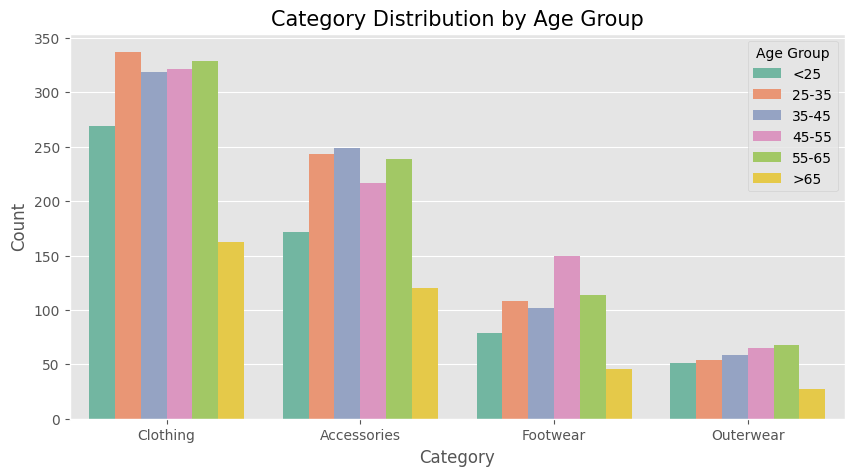

In [93]:
#Catergory and age group as hue
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df, hue='Age Group', palette='Set2', order=df['Category'].value_counts().index)
plt.title('Category Distribution by Age Group', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

- The age category that spends the largest amount is in the 45 - 55 age range (45619 USD).
- As we can see, Clothing is the most popular category among all age groups.
- Accessories are equally popular in all age groups except the <25 and >65 years age groups.
- However, we have seen that the Footwear category is most popular in the 45-55 age group.
- Lastly, Outerwear is almost equally famous among all age groups.

### *Customers that buy discount product using pie chart*

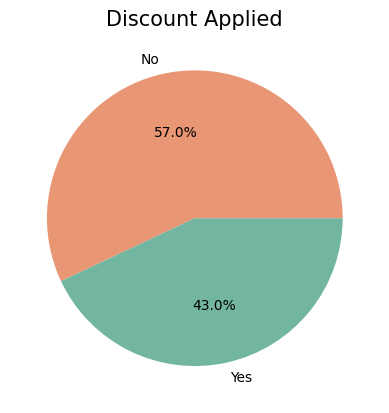

In [94]:
plt.style.use('ggplot')
df['Discount Applied'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#e99675','#72b6a1'])
plt.title('Discount Applied', fontsize=15)
plt.ylabel('')
plt.show()

### *Purchase amount of the discount product*

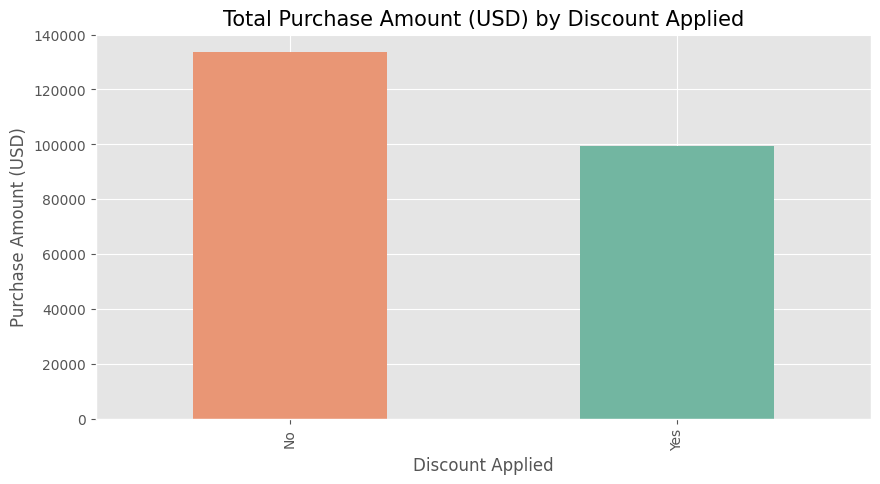

In [95]:
#Discount Applied and sum amount of purchase
plt.figure(figsize=(10,5))
df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().plot.bar(color=['#e99675','#72b6a1'])
plt.title('Total Purchase Amount (USD) by Discount Applied', fontsize=15)
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### *Subscribtion Status percentage using pie chart*

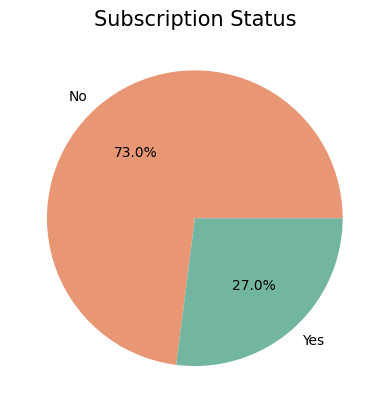

In [96]:
plt.style.use('ggplot')
df['Subscription Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#e99675','#72b6a1'])
plt.title('Subscription Status', fontsize=15)
plt.ylabel('')
plt.show()

### *Purchase Amount per Subscription Status*

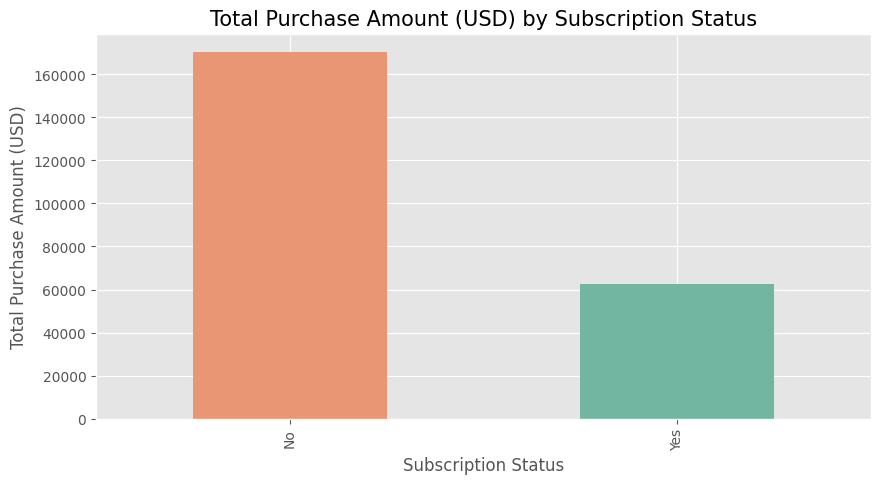

In [97]:
#Purchase Amount (USD) and subscription type as hue
# Sum 'Purchase Amount (USD)' for each 'Subscription Status'
grouped = df.groupby('Subscription Status')['Purchase Amount (USD)'].sum().reset_index()

plt.figure(figsize=(10,5))
df.groupby('Subscription Status')['Purchase Amount (USD)'].sum().plot.bar(color=['#e99675','#72b6a1'])
plt.title('Total Purchase Amount (USD) by Subscription Status', fontsize=15)
plt.xlabel('Subscription Status')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()


### *Number of customers per Shipping method using bar plot*

C:\Users\Aby\AppData\Local\Temp\ipykernel_6376\3497518857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shipping Type', data=df, palette='Set2', order=df['Shipping Type'].value_counts().index)


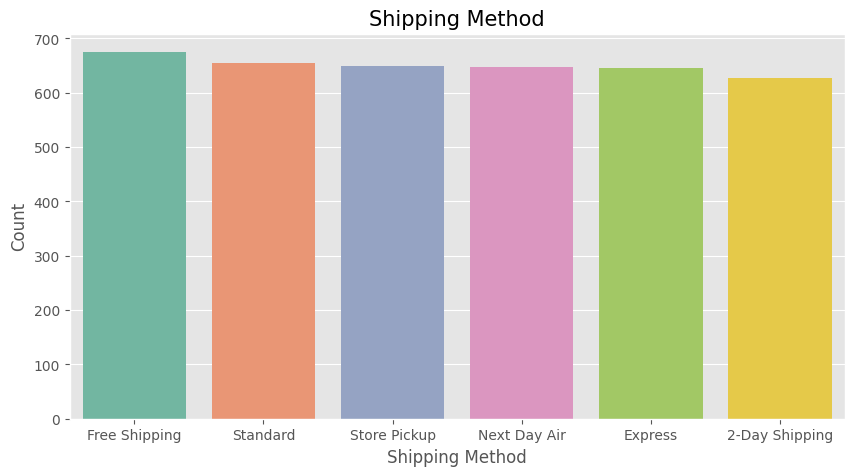

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(x='Shipping Type', data=df, palette='Set2', order=df['Shipping Type'].value_counts().index)
plt.title('Shipping Method', fontsize=15)
plt.xlabel('Shipping Method')
plt.ylabel('Count')
plt.show()

- Providing discounts and providing a subscription system does not have a positive impact on sales.

- The shipping method preferred by customers is free shipping.

- It is better to shift the costs of providing discounts and also providing a subscription system to free shipping promos.

- With the free shipping method being popular with customers, it can be used as a free shipping gimmick. Like buying goods with a certain minimum price to get free shipping.

- Since the current average purchase amount is around 60 USD and we want to increase it to 65 USD or more, we can set spending milestone targets per user, and once users reach those milestones, users can get attractive promotions, one of which is free shipping.

### *Payment method preferences*

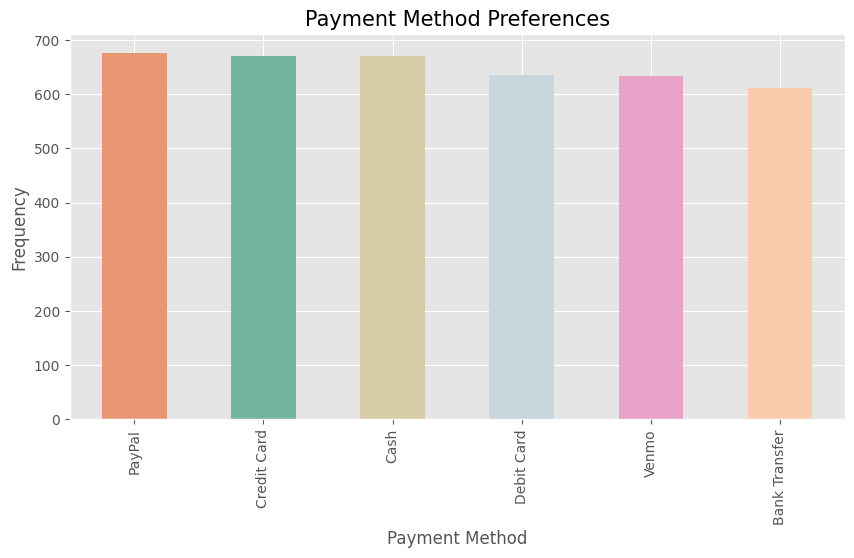

In [99]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
df['Payment Method'].value_counts().plot.bar(color=['#e99675','#72b6a1','#d9cda9','#c9d6de','#e9a3c9','#f9cdac'])
plt.title('Payment Method Preferences', fontsize=15)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

- Most users prefer to pay using PayPal and credit cards
- So make sure to provide this payment method on your e-commerce site, to attract and make it easier for users to carry out transactions

### *Peak season*

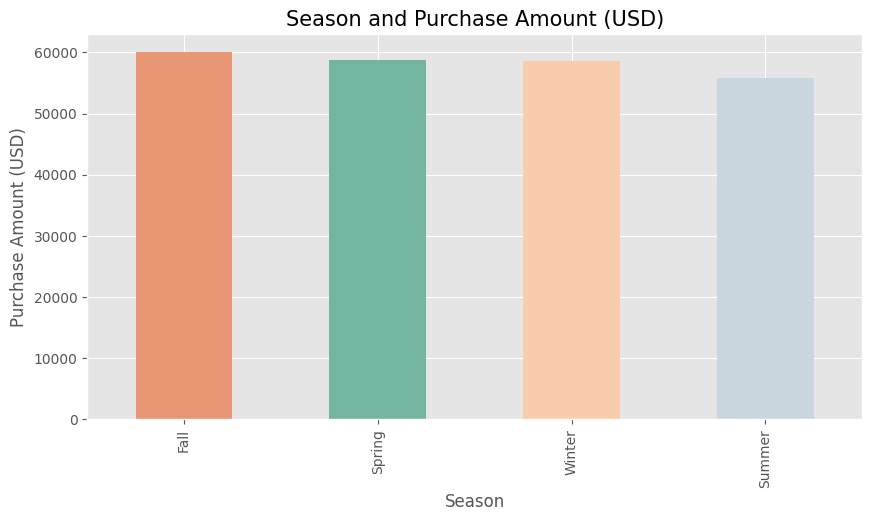

In [100]:
plt.figure(figsize=(10,5))
df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False).plot.bar(color=['#e99675','#72b6a1','#f9cdac','#c9d6de'])
plt.title('Season and Purchase Amount (USD)', fontsize=15)
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

- If you look at the data on how much money is spent each season, it can be concluded that the peak season occurs in the fall

# **Insights Summary**

- **Men accounted for 68%** of total purchases, while **women accounted for 32%** of purchases.

- **Clothing** is the category that contributes the **largest revenue** and is in **demand by all regions, gender, and age groups**.

- The **Outerwear category** has a **lower number of purchases** compared to other categories.

- **Montana, Illinois, California, Idaho,** and **Alabama** are the regions that have the most customers

- **Clothing** is the favorite category in the top 5 regions

- The **age category** that **spends the largest amount** is in the **45 - 55 year** age range

- Users prefer to pay using **PayPal**, **Credit Cards**, and **Cash**.

- Peak Season occurs in **Fall**

- Providing **discounts** and providing a **subscription system** does **not have a positive impact on sales**.

- The **shipping method** preferred by customers is **free shipping**.

- The average purchase amount is **currently around 60 USD** and would like to **target 65 USD or more**.